# kernel_experiments

This code provides a structured experimental framework for studying the behavior of Support Vector Machines (SVMs) under different data distributions and kernel choices. Multiple synthetic classification datasets are generated, including linearly separable data, nonlinearly separable patterns, and noisy circular structures. By visualizing decision boundaries and classification results, the code enables direct observation of how margin size, support vectors, and accuracy are affected by changes in model parameters and data complexity.

In addition to standard SVM kernels such as linear, polynomial, RBF, and sigmoid, the code explores custom-designed kernel functions that combine multiple kernel characteristics into a single similarity measure.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import (
    make_classification,
    make_circles,
    make_gaussian_quantiles
)


## Utility Functions

In [2]:
def apply_pca(X, n_components=2):
    """Reduce features to n_components using PCA."""
    return PCA(n_components=n_components).fit_transform(X)

In [3]:
CLASSIFICATION_SEEDS = [64, 17, 91, 15, 6, 53]
CIRCLE_SEEDS = [5, 12, 15]
CIRCLE_NOISE = [0, 0.1, 0.3, 0.99]

In [4]:
# Dataset generators

def generate_linear_datasets(seeds, clusters=1):
    """Generate linearly separable classification datasets."""
    for seed in seeds:
        X, y = make_classification(
            n_samples=1000,
            n_features=5,
            n_classes=2,
            n_clusters_per_class=clusters,
            random_state=seed
        )
        yield apply_pca(X), y

def generate_circle_datasets():
    """Generate noisy circle datasets."""
    for seed, noise in zip(CIRCLE_SEEDS, CIRCLE_NOISE):
        X, y = make_circles(n_samples=1000, noise=noise, random_state=seed)
        yield apply_pca(X), y

def generate_circle_datasets():
    """Generate noisy circle datasets."""
    for seed, noise in zip(CIRCLE_SEEDS, CIRCLE_NOISE):
        X, y = make_circles(n_samples=1000, noise=noise, random_state=seed)
        yield apply_pca(X), y

def generate_gaussian_dataset():
    X, y = make_gaussian_quantiles(
        n_samples=1000, n_features=5, n_classes=2, random_state=61
    )
    return apply_pca(X), y


## Dataset Visualization

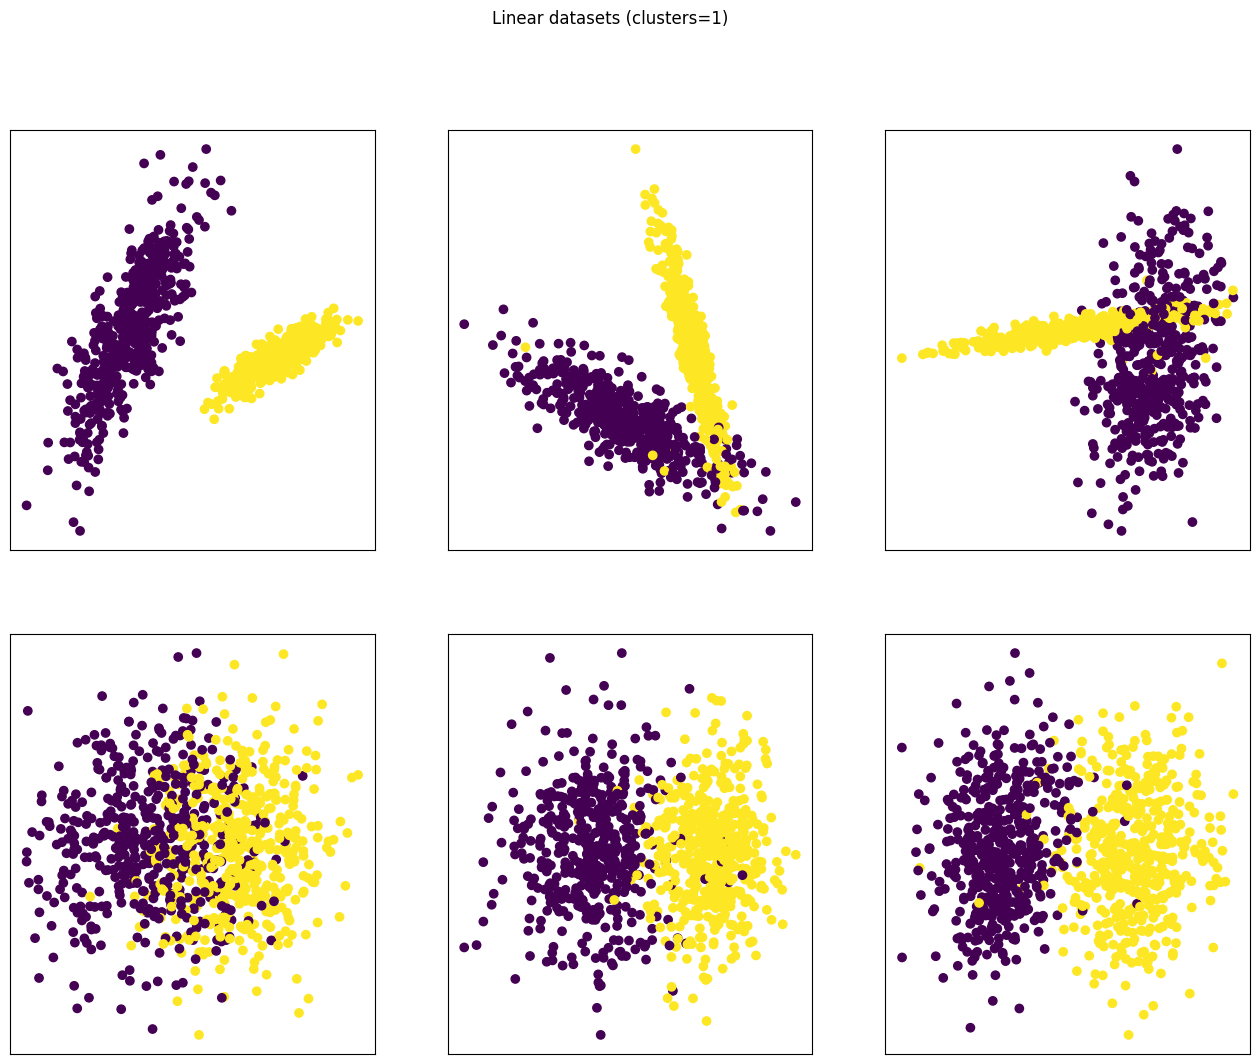

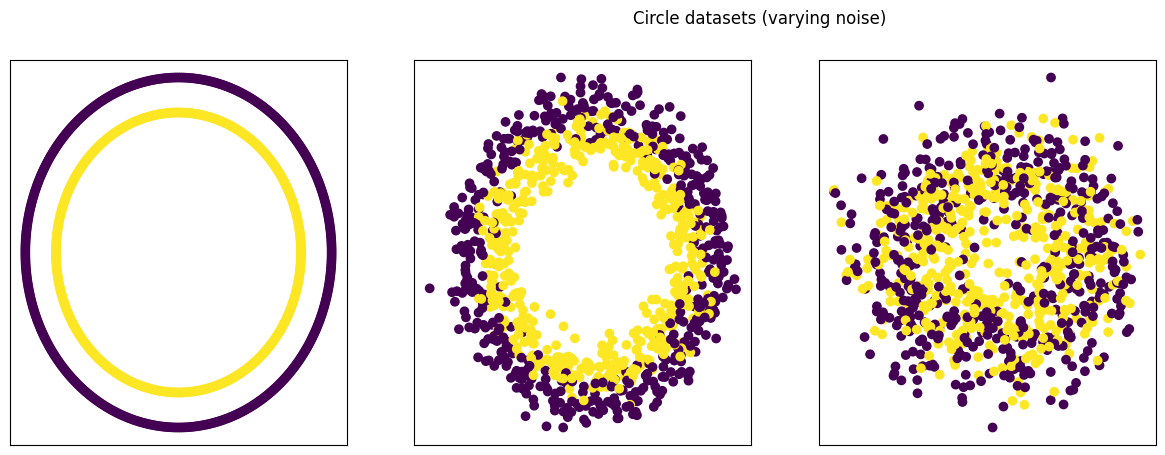

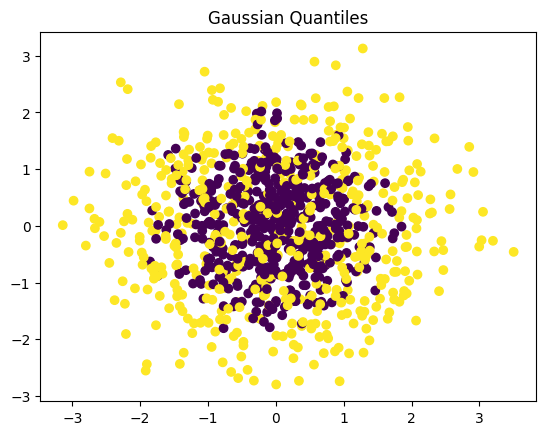

In [5]:
def plot_datasets(datasets, title, rows, cols, figsize):
    plt.figure(figsize=figsize)
    for i, (X, y) in enumerate(datasets):
        plt.subplot(rows, cols, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(title)
    plt.show()

plot_datasets(
    generate_linear_datasets(CLASSIFICATION_SEEDS),
    "Linear datasets (clusters=1)",
    2, 3, (16, 12)
)

plot_datasets(
    generate_circle_datasets(),
    "Circle datasets (varying noise)",
    1, 4, (20, 5)
)

Xg, yg = generate_gaussian_dataset()
plt.scatter(Xg[:, 0], Xg[:, 1], c=yg)
plt.title("Gaussian Quantiles")
plt.show()


## Linear SVM Visualization

In [6]:
def plot_linear_svm(X, y, C_values=(10, 1, 0.5, 0.025)):
    """Visualize linear SVM decision boundaries and margins."""
    for C in C_values:
        clf = SVC(kernel="linear", C=C)
        clf.fit(X, y)

        w = clf.coef_[0]
        b = clf.intercept_[0]
        slope = -w[0] / w[1]

        xx = np.linspace(X[:, 0].min(), X[:, 0].max())
        yy = slope * xx - b / w[1]

        margin = 1 / np.linalg.norm(w)
        yy_down = yy - np.sqrt(1 + slope**2) * margin
        yy_up = yy + np.sqrt(1 + slope**2) * margin

        plt.figure(figsize=(5, 6))
        plt.plot(xx, yy, "k-")
        plt.plot(xx, yy_down, "k--")
        plt.plot(xx, yy_up, "k--")

        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
        plt.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            edgecolors="k"
        )

        plt.title(f"C={C} | Accuracy={clf.score(X, y):.3f}")
        plt.xticks([])
        plt.yticks([])
        plt.show()

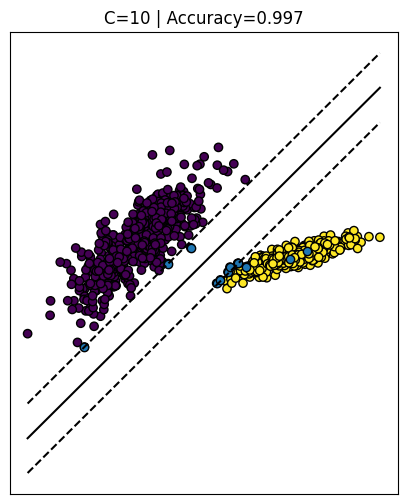

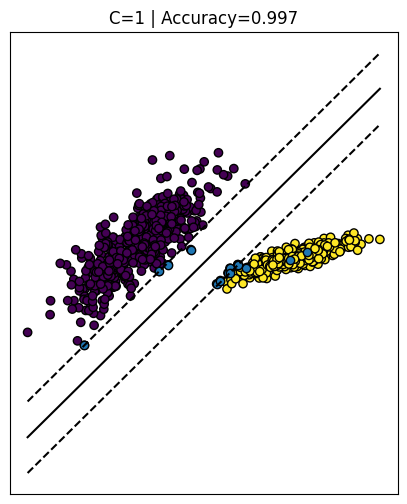

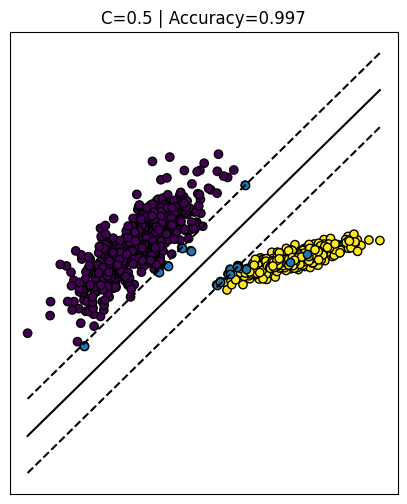

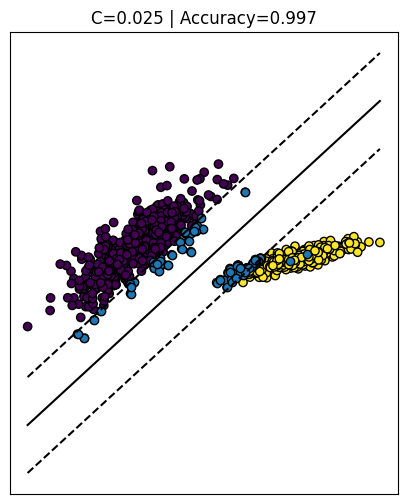

In [7]:
X, y = next(generate_linear_datasets(CLASSIFICATION_SEEDS))
plot_linear_svm(X, y)

## Kernel Experiments

In [8]:
def evaluate_svm(kernel, param_grid, dataset_generators):
    """Train SVMs over datasets and parameter grid."""
    for params in param_grid:
        for name, generator in dataset_generators.items():
            for i, (X, y) in enumerate(generator()):
                clf = SVC(kernel=kernel, **params)
                clf.fit(X, y)
                acc = clf.score(X, y)
                print(f"{kernel} | {params} | {name} {i+1} | acc={acc:.3f}")

In [9]:
datasets = {
    "linear": lambda: generate_linear_datasets(CLASSIFICATION_SEEDS),
    "circles": generate_circle_datasets,
    "gaussian": lambda: [generate_gaussian_dataset()],
}

### Polynomial kernel

In [10]:
evaluate_svm(
    kernel="poly",
    param_grid=[{"C": c, "degree": d} for c in [0.01, 0.1, 0.5, 1] for d in [2, 3, 4]],
    dataset_generators=datasets
)

poly | {'C': 0.01, 'degree': 2} | linear 1 | acc=0.629
poly | {'C': 0.01, 'degree': 2} | linear 2 | acc=0.632
poly | {'C': 0.01, 'degree': 2} | linear 3 | acc=0.695
poly | {'C': 0.01, 'degree': 2} | linear 4 | acc=0.528
poly | {'C': 0.01, 'degree': 2} | linear 5 | acc=0.527
poly | {'C': 0.01, 'degree': 2} | linear 6 | acc=0.501
poly | {'C': 0.01, 'degree': 2} | circles 1 | acc=1.000
poly | {'C': 0.01, 'degree': 2} | circles 2 | acc=0.746
poly | {'C': 0.01, 'degree': 2} | circles 3 | acc=0.590
poly | {'C': 0.01, 'degree': 2} | gaussian 1 | acc=0.739
poly | {'C': 0.01, 'degree': 3} | linear 1 | acc=0.981
poly | {'C': 0.01, 'degree': 3} | linear 2 | acc=0.740
poly | {'C': 0.01, 'degree': 3} | linear 3 | acc=0.765
poly | {'C': 0.01, 'degree': 3} | linear 4 | acc=0.780
poly | {'C': 0.01, 'degree': 3} | linear 5 | acc=0.932
poly | {'C': 0.01, 'degree': 3} | linear 6 | acc=0.948
poly | {'C': 0.01, 'degree': 3} | circles 1 | acc=0.502
poly | {'C': 0.01, 'degree': 3} | circles 2 | acc=0.569
pol

### RBF kernel

In [11]:
evaluate_svm(
    kernel="rbf",
    param_grid=[{"C": c, "gamma": g} for c in [0.1, 0.5, 1] for g in [0.1, 0.01]],
    dataset_generators=datasets
)

rbf | {'C': 0.1, 'gamma': 0.1} | linear 1 | acc=0.997
rbf | {'C': 0.1, 'gamma': 0.1} | linear 2 | acc=0.956
rbf | {'C': 0.1, 'gamma': 0.1} | linear 3 | acc=0.867
rbf | {'C': 0.1, 'gamma': 0.1} | linear 4 | acc=0.811
rbf | {'C': 0.1, 'gamma': 0.1} | linear 5 | acc=0.960
rbf | {'C': 0.1, 'gamma': 0.1} | linear 6 | acc=0.967
rbf | {'C': 0.1, 'gamma': 0.1} | circles 1 | acc=1.000
rbf | {'C': 0.1, 'gamma': 0.1} | circles 2 | acc=0.693
rbf | {'C': 0.1, 'gamma': 0.1} | circles 3 | acc=0.570
rbf | {'C': 0.1, 'gamma': 0.1} | gaussian 1 | acc=0.736
rbf | {'C': 0.1, 'gamma': 0.01} | linear 1 | acc=0.997
rbf | {'C': 0.1, 'gamma': 0.01} | linear 2 | acc=0.937
rbf | {'C': 0.1, 'gamma': 0.01} | linear 3 | acc=0.842
rbf | {'C': 0.1, 'gamma': 0.01} | linear 4 | acc=0.813
rbf | {'C': 0.1, 'gamma': 0.01} | linear 5 | acc=0.957
rbf | {'C': 0.1, 'gamma': 0.01} | linear 6 | acc=0.966
rbf | {'C': 0.1, 'gamma': 0.01} | circles 1 | acc=1.000
rbf | {'C': 0.1, 'gamma': 0.01} | circles 2 | acc=0.580
rbf | {'C': 0

### Sigmoid kernel

In [12]:
evaluate_svm(
    kernel="sigmoid",
    param_grid=[{"C": c} for c in [0.1, 0.5, 1]],
    dataset_generators=datasets
)

sigmoid | {'C': 0.1} | linear 1 | acc=0.989
sigmoid | {'C': 0.1} | linear 2 | acc=0.952
sigmoid | {'C': 0.1} | linear 3 | acc=0.787
sigmoid | {'C': 0.1} | linear 4 | acc=0.777
sigmoid | {'C': 0.1} | linear 5 | acc=0.959
sigmoid | {'C': 0.1} | linear 6 | acc=0.961
sigmoid | {'C': 0.1} | circles 1 | acc=0.491
sigmoid | {'C': 0.1} | circles 2 | acc=0.503
sigmoid | {'C': 0.1} | circles 3 | acc=0.509
sigmoid | {'C': 0.1} | gaussian 1 | acc=0.542
sigmoid | {'C': 0.5} | linear 1 | acc=0.978
sigmoid | {'C': 0.5} | linear 2 | acc=0.959
sigmoid | {'C': 0.5} | linear 3 | acc=0.758
sigmoid | {'C': 0.5} | linear 4 | acc=0.741
sigmoid | {'C': 0.5} | linear 5 | acc=0.956
sigmoid | {'C': 0.5} | linear 6 | acc=0.919
sigmoid | {'C': 0.5} | circles 1 | acc=0.502
sigmoid | {'C': 0.5} | circles 2 | acc=0.493
sigmoid | {'C': 0.5} | circles 3 | acc=0.510
sigmoid | {'C': 0.5} | gaussian 1 | acc=0.546
sigmoid | {'C': 1} | linear 1 | acc=0.997
sigmoid | {'C': 1} | linear 2 | acc=0.945
sigmoid | {'C': 1} | linea

### Custom Combined Kernels

In [13]:
def combined_kernel(x1, x2):
    """Polynomial (deg=2) × RBF kernel."""
    gamma = 1.0
    return ((x1 @ x2.T) + 1) ** 2 * np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

def combined_kernel_2(x1, x2):
    """Polynomial (deg=3) × RBF kernel."""
    gamma = 1.0
    return ((x1 @ x2.T) + 1) ** 3 * np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

def combined_kernel_3(x1, x2):
    """Polynomial × RBF + squared sigmoid kernel."""
    gamma = 0.1
    poly = ((x1 @ x2.T) + 1) ** 2
    rbf = np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
    sigmoid = np.tanh(x1 @ x2.T)
    return poly * rbf + sigmoid ** 2


### Custom Kernel Evaluation

In [14]:
for kernel_fn in [combined_kernel, combined_kernel_2]:
    for X, y in generate_circle_datasets():
        model = SVC(kernel=kernel_fn)
        model.fit(X, y)
        print(f"{kernel_fn.__name__}: {model.score(X, y):.3f}")

combined_kernel: 1.000
combined_kernel: 0.844
combined_kernel: 0.622
combined_kernel_2: 1.000
combined_kernel_2: 0.848
combined_kernel_2: 0.624


In [15]:
Xg, yg = generate_gaussian_dataset()
model = SVC(kernel=combined_kernel_3)
model.fit(Xg, yg)
print("combined_kernel_3:", model.score(Xg, yg))

combined_kernel_3: 0.637
